<div style="padding: -5px;
  text-align: center;
  color: white;
  font-size: 15px;">
   <img src="images/banner.jpg" alt="MINE-Seminario de programación" style="width:100%;">
  <h1 style="
  position: absolute;
  top: 5%;
  left: 50%;">Caso de Estudio</h1>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-datos" data-toc-modified-id="Exploración-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración datos</a></span></li><li><span><a href="#Nivel-de-obesidad" data-toc-modified-id="Nivel-de-obesidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nivel de obesidad</a></span></li><li><span><a href="#Exploración-Previa---Solo-cuantitativa" data-toc-modified-id="Exploración-Previa---Solo-cuantitativa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración Previa - Solo cuantitativa</a></span></li><li><span><a href="#Exploración-Total" data-toc-modified-id="Exploración-Total-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploración Total</a></span></li><li><span><a href="#Aprendizaje-Supervisado" data-toc-modified-id="Aprendizaje-Supervisado-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aprendizaje Supervisado</a></span></li><li><span><a href="#Infome-Final" data-toc-modified-id="Infome-Final-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Infome Final</a></span></li></ul></div>

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
DataO=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
DataO.info()
#ojo porque usaron smoot y donde deberìa haber un cero queda 0.05, porque las variables son categoricas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
DataO

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.00,3.00,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.98,1.75,133.74,yes,yes,3.00,3.00,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.52,1.75,133.69,yes,yes,3.00,3.00,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.36,1.74,133.35,yes,yes,3.00,3.00,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
DataO["mass_boddy_index"]= (DataO["Weight"])/((DataO["Height"])*(DataO["Height"]))

In [6]:
#FCVC, NCP, CH2O,FAF, TUE
#astype() 

## Descripción de las variables de la base de datos

- **Gender**: Genero masculino o femenino
- **Age**: edad
- **Height**: altura, variable numerica continua 
- **Weight**: Peso, variable numerica continua
- **mass_boddy_index**


- **family_history_with_overweight**: ¿Algún familiar ha sufrido o padece sobrepeso?, variable cualitativa nominal dicotomica.
- **FAVC**: ¿Comes alimentos altos en calorías con frecuencia?, variable cualitativa nominal dicotomica.
- **FCVC**: ¿Sueles comer verduras en tus comidas?, Varible cualitativa ordinal [Nunca, A veces,Siempre]
- **NCP**: ¿Cuántas comidas principales tienes diariamente?, Varible cualitativa ordinal [Entre 1 y 2, Tres, Más de tres]
- **CAEC**: ¿Comes algún alimento entre comidas?, Varible cualitativa ordinal [No, A veces,Frecuentemente, Siempre]
- **SMOKE**: variable cualitativa nominal dicotomica [Yes, No]
- **CH2O**: Varible cualitativa ordinal, ¿Cuánta agua bebes a diario?, [Menos de un litro, Entre 1 y 2 L, Más de 2 L]
- **SCC**: ¿Controlas las calorías que consumes a diario?, variable cualitativa nominal dicotomica [Yes, No]
- **FAF**: Varible cualitativa ordinal, ¿Con qué frecuencia realizas actividad física?, [No tengo, 1 o 2 días, 2 o 4 días, 4 o 5 días]
- **TUE**: ¿Cuánto tiempo utilizas dispositivos tecnológicos como celular, videojuegos, televisión, computadora y otros? [0–2 horas,3–5 horas,Más de 5 horas] 
- **CALC**:¿con qué frecuencia bebes alcohol? [No bebo,A veces,Frecuentemente,Siempre]
- **MTRANS**:¿Qué transporte utilizas habitualmente? [Automóvil,Moto,Bicicleta,Transporte Público,Andante]
- **NObeyesdad**: tipo de obesidad, Varible cualitativa ordinal, ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II','Obesity_Type_III']

In [7]:
#DataO

DataO['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [8]:
numericos_db = DataO.select_dtypes(include = ["number"])
numericos_db.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,mass_boddy_index
0,21.00,1.62,64.00,2.00,3.00,2.00,0.00,1.00,24.39
1,21.00,1.52,56.00,3.00,3.00,3.00,3.00,0.00,24.24
2,23.00,1.80,77.00,2.00,3.00,2.00,2.00,1.00,23.77
3,27.00,1.80,87.00,3.00,3.00,2.00,2.00,0.00,26.85
4,22.00,1.78,89.80,2.00,1.00,2.00,0.00,0.00,28.34


In [9]:
numericos_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2111 non-null   float64
 1   Height            2111 non-null   float64
 2   Weight            2111 non-null   float64
 3   FCVC              2111 non-null   float64
 4   NCP               2111 non-null   float64
 5   CH2O              2111 non-null   float64
 6   FAF               2111 non-null   float64
 7   TUE               2111 non-null   float64
 8   mass_boddy_index  2111 non-null   float64
dtypes: float64(9)
memory usage: 148.6 KB


### Limpiando la base

Algunas variables fueron afectadas por la técnica de SMOTE por lo que es necesario redondearlas y recodificar variables.

Es necesario redondear todas las variables de tipo categorico para quitar los decimales

In [10]:
DataO["Age"]=round(DataO["Age"])
DataO["FCVC"]=round(DataO["FCVC"])
DataO["NCP"]=round(DataO["NCP"])
DataO["CH2O"]=round(DataO["CH2O"])
DataO["FAF"]=round(DataO["FAF"])
DataO["TUE"]=round(DataO["TUE"])
#Age

In [11]:
#pasando a entero 
DataO["Age"]=round(DataO["Age"]).astype(int)
DataO["FCVC"]=round(DataO["FCVC"]).astype(int)
DataO["NCP"]=round(DataO["NCP"]).astype(int)
DataO["CH2O"]=round(DataO["CH2O"]).astype(int)
DataO["FAF"]=round(DataO["FAF"]).astype(int)
DataO["TUE"]=round(DataO["TUE"]).astype(int)


In [12]:
#FCVC, NCP, CH2O,FAF, TUE
#astype()

DataO["FCVC"]=round(DataO["FCVC"]).astype(object)
DataO["NCP"]=round(DataO["NCP"]).astype(object)
DataO["CH2O"]=round(DataO["CH2O"]).astype(object)
DataO["FAF"]=round(DataO["FAF"]).astype(object)
DataO["TUE"]=round(DataO["TUE"]).astype(object)

usando datos numericos y normalizandolos 

In [13]:
numericos_DataO= DataO.copy()

In [14]:
ss = StandardScaler()
scale_features = ['Height', 'Weight', 'mass_boddy_index']

In [15]:
numericos_DataO[scale_features] = ss.fit_transform(numericos_DataO[scale_features])
#DataO.describe()

In [16]:
numericos_DataO=numericos_DataO[['Height', 'Weight', 'mass_boddy_index']]

In [17]:
numericos_DataO

,Height,Weight,mass_boddy_index
0,-0.88,-0.86,-0.66
1,-1.95,-1.17,-0.68
2,1.05,-0.37,-0.74
3,1.05,0.02,-0.36
4,0.84,0.12,-0.17
...,...,...,...
2106,0.10,1.71,1.90
2107,0.50,1.80,1.75
2108,0.54,1.80,1.73
2109,0.40,1.79,1.79


In [18]:
numericos_DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Height            2111 non-null   float64
 1   Weight            2111 non-null   float64
 2   mass_boddy_index  2111 non-null   float64
dtypes: float64(3)
memory usage: 49.6 KB


Categorizando 

In [19]:
DataO["FCVC"]=pd.Categorical(DataO["FCVC"])
DataO["NCP"]=pd.Categorical(DataO["NCP"])
DataO["CH2O"]=pd.Categorical(DataO["CH2O"])
DataO["FAF"]=pd.Categorical(DataO["FAF"])

Se hace un DF con los datos categoricos 

In [20]:
categorical_features = ['family_history_with_overweight', 'FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']

In [21]:
df_cat = pd.get_dummies(DataO[categorical_features])
df_cat

,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_1,FCVC_2,FCVC_3,NCP_1,NCP_2,NCP_3,NCP_4,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_1,CH2O_2,CH2O_3,SCC_no,SCC_yes,FAF_0,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2107,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2108,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2109,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [22]:
df_final = pd.concat([ df_cat,DataO['NObeyesdad']], axis=1)
df_final

,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_1,FCVC_2,FCVC_3,NCP_1,NCP_2,NCP_3,NCP_4,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_1,CH2O_2,CH2O_3,SCC_no,SCC_yes,FAF_0,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Normal_Weight
1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Normal_Weight
2,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,Normal_Weight
3,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2107,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2108,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2109,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III


Empizo a elaborar la red neuronal 

Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfretamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas. En lo que sigue se sugeriran algunos puntos a desarrollar en este trabajo.

## Exploración de datos

La idea en esta sección es hacer un EDA sobre la base. Es muy importante identificar datos atípicos, nulos y relaciones entre variables (colinealidad, alta correlación, etc.).

## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<AxesSubplot:xlabel='Weight', ylabel='Height'>

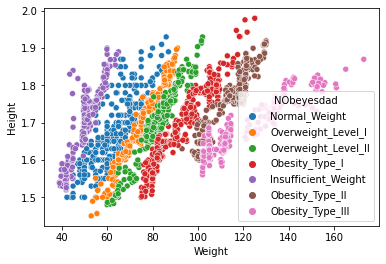

In [23]:
import seaborn as sns
sns.scatterplot(data=DataO,x='Weight',y='Height',hue='NObeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

## Exploración Previa - Solo cuantitativa

In [24]:
import random
random.seed(1234)

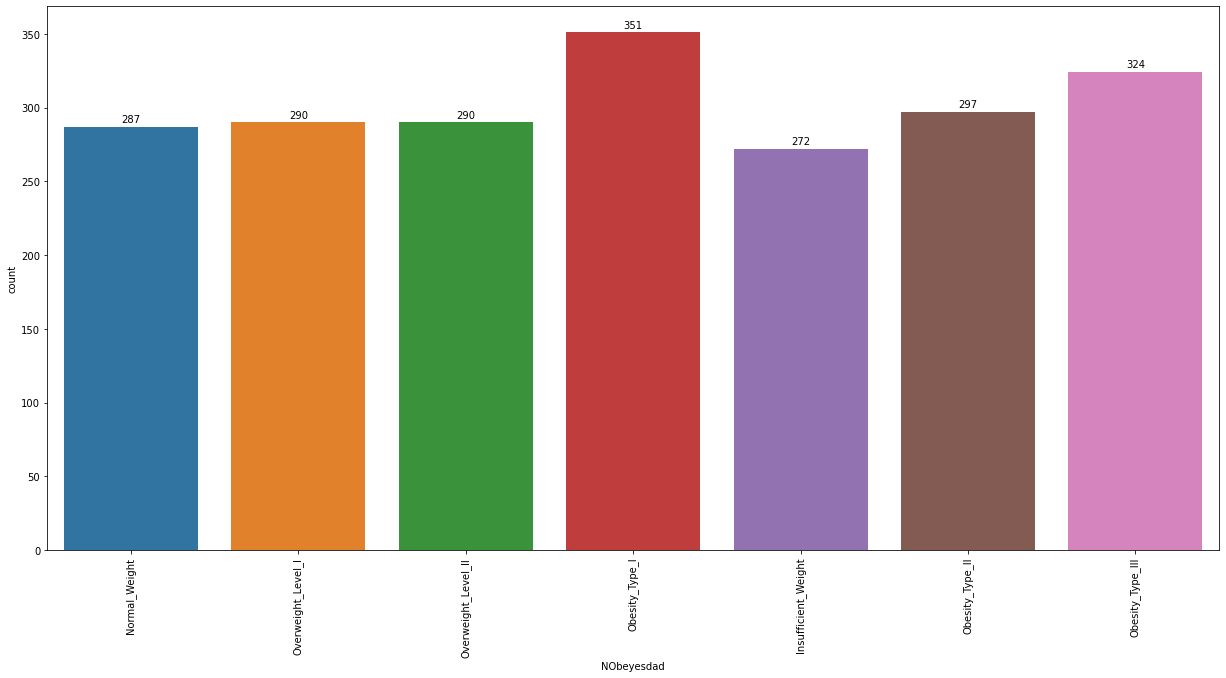

In [25]:
fig, ax= plt.subplots(figsize=(21,10))
ax = sns.countplot(x="NObeyesdad", data=DataO) # for Seaborn version 0.7 and more
plt.xticks(rotation=90, horizontalalignment="center")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3 ,
            '{:1.0f}'.format(height),
            ha="center") 

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano.

usar dispersiones 


In [26]:
corr = numericos_DataO.corr()
corr.style.background_gradient(cmap='coolwarm')

,Height,Weight,mass_boddy_index
Height,1.000000,0.463136,0.131785
Weight,0.463136,1.000000,0.934806
mass_boddy_index,0.131785,0.934806,1.000000


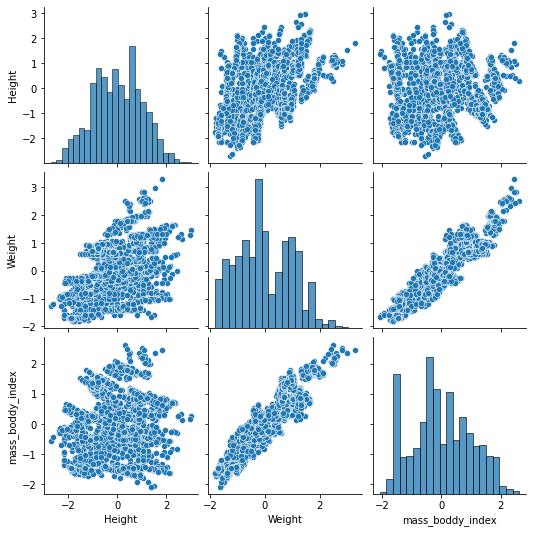

In [27]:
# Ejemplo pairplot con datase iris
g = sns.pairplot(numericos_DataO) 

3. Concluyan a partir de los resultados.

Hay alta correlación entre las variables mass_boddy_index y wight, por otra parte la variable hight no tiene correlación con las otras variables numéricas, por ende para el modelo se va a despreciar la variable hight.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan responder la pregunta inicial:

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Arboles de decisión
* Red neuronal

3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)

4. De acuerdo con los resultados identifico problemas como sobre ajuste y mal desempeño del modelo.

5. Si lo anterior resulta cierto aplico técnicas de regularización para estimar un modelo de clasificación adecuado.

6. Visualizamos el modelo (si es posible). 

### Modelo de clasificación con una red neuronal

Ahora vamos a crear un modelo para predecir la variable NObeyesdad:

asignando capas al modelo

In [28]:
X = df_final.drop('NObeyesdad', axis=1).values

In [29]:
y = np.asarray(pd.get_dummies(df_final['NObeyesdad']).values).astype('float32')
print(X.shape, y.shape)

(2111, 38) (2111, 7)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(1688, 38) (1688, 7) (423, 38) (423, 7)


In [31]:
X_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [32]:
mul_clas = Sequential()
mul_clas.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
mul_clas.add(Dense(32, activation='relu'))
mul_clas.add(Dense(16, activation='relu'))
mul_clas.add(Dense(7, activation='softmax'))
mul_clas.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = mul_clas.fit(X_train, y_train, epochs=1000, verbose=0)

In [34]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

<Figure size 576x432 with 0 Axes>

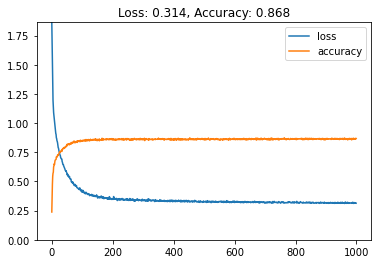

In [35]:
plot_loss_accuracy(history)

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        67
           1       0.40      0.44      0.42        52
           2       0.66      0.70      0.68        60
           3       0.66      0.83      0.74        52
           4       0.85      0.98      0.91        65
           5       0.55      0.49      0.52        59
           6       0.58      0.41      0.48        68

    accuracy                           0.65       423
   macro avg       0.63      0.64      0.63       423
weighted avg       0.64      0.65      0.64       423



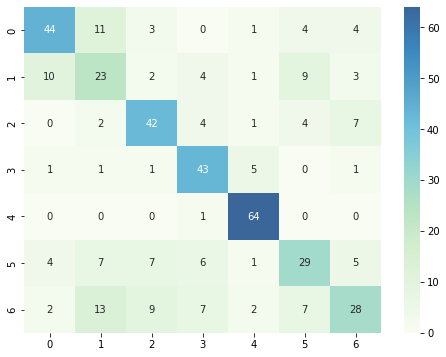

In [36]:
y_pred_class = np.argmax(mul_clas.predict(X_test, verbose=0),axis=1)
y_test_class = np.argmax(y_test, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_test, y_test_class)

### arbol de decision

In [37]:
import matplotlib.pyplot as plt #para dibujar graficas 
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier # para construir el arbol de clasificacion
from sklearn.tree import plot_tree #para dibujar el arbol de clasificacion 
from sklearn.model_selection import train_test_split # dividir los datos en el set de entrenamiento y prueba 
from sklearn.model_selection import cross_val_score # para hacer una validacion cruzada
from sklearn.metrics import confusion_matrix # para crear la matriz de confusion 
from sklearn.metrics import plot_confusion_matrix #para mostrar la matriz de confusion 

In [38]:
#split data in two training and testing sets 
#x_train, x_test, y_train, y_test = train_test_split(df_1,y)

#create a desucuibt tree abd fit it to the training data 
clf_dt_n = DecisionTreeClassifier()
clf_dt_n = clf_dt_n.fit(X_train,y_train)

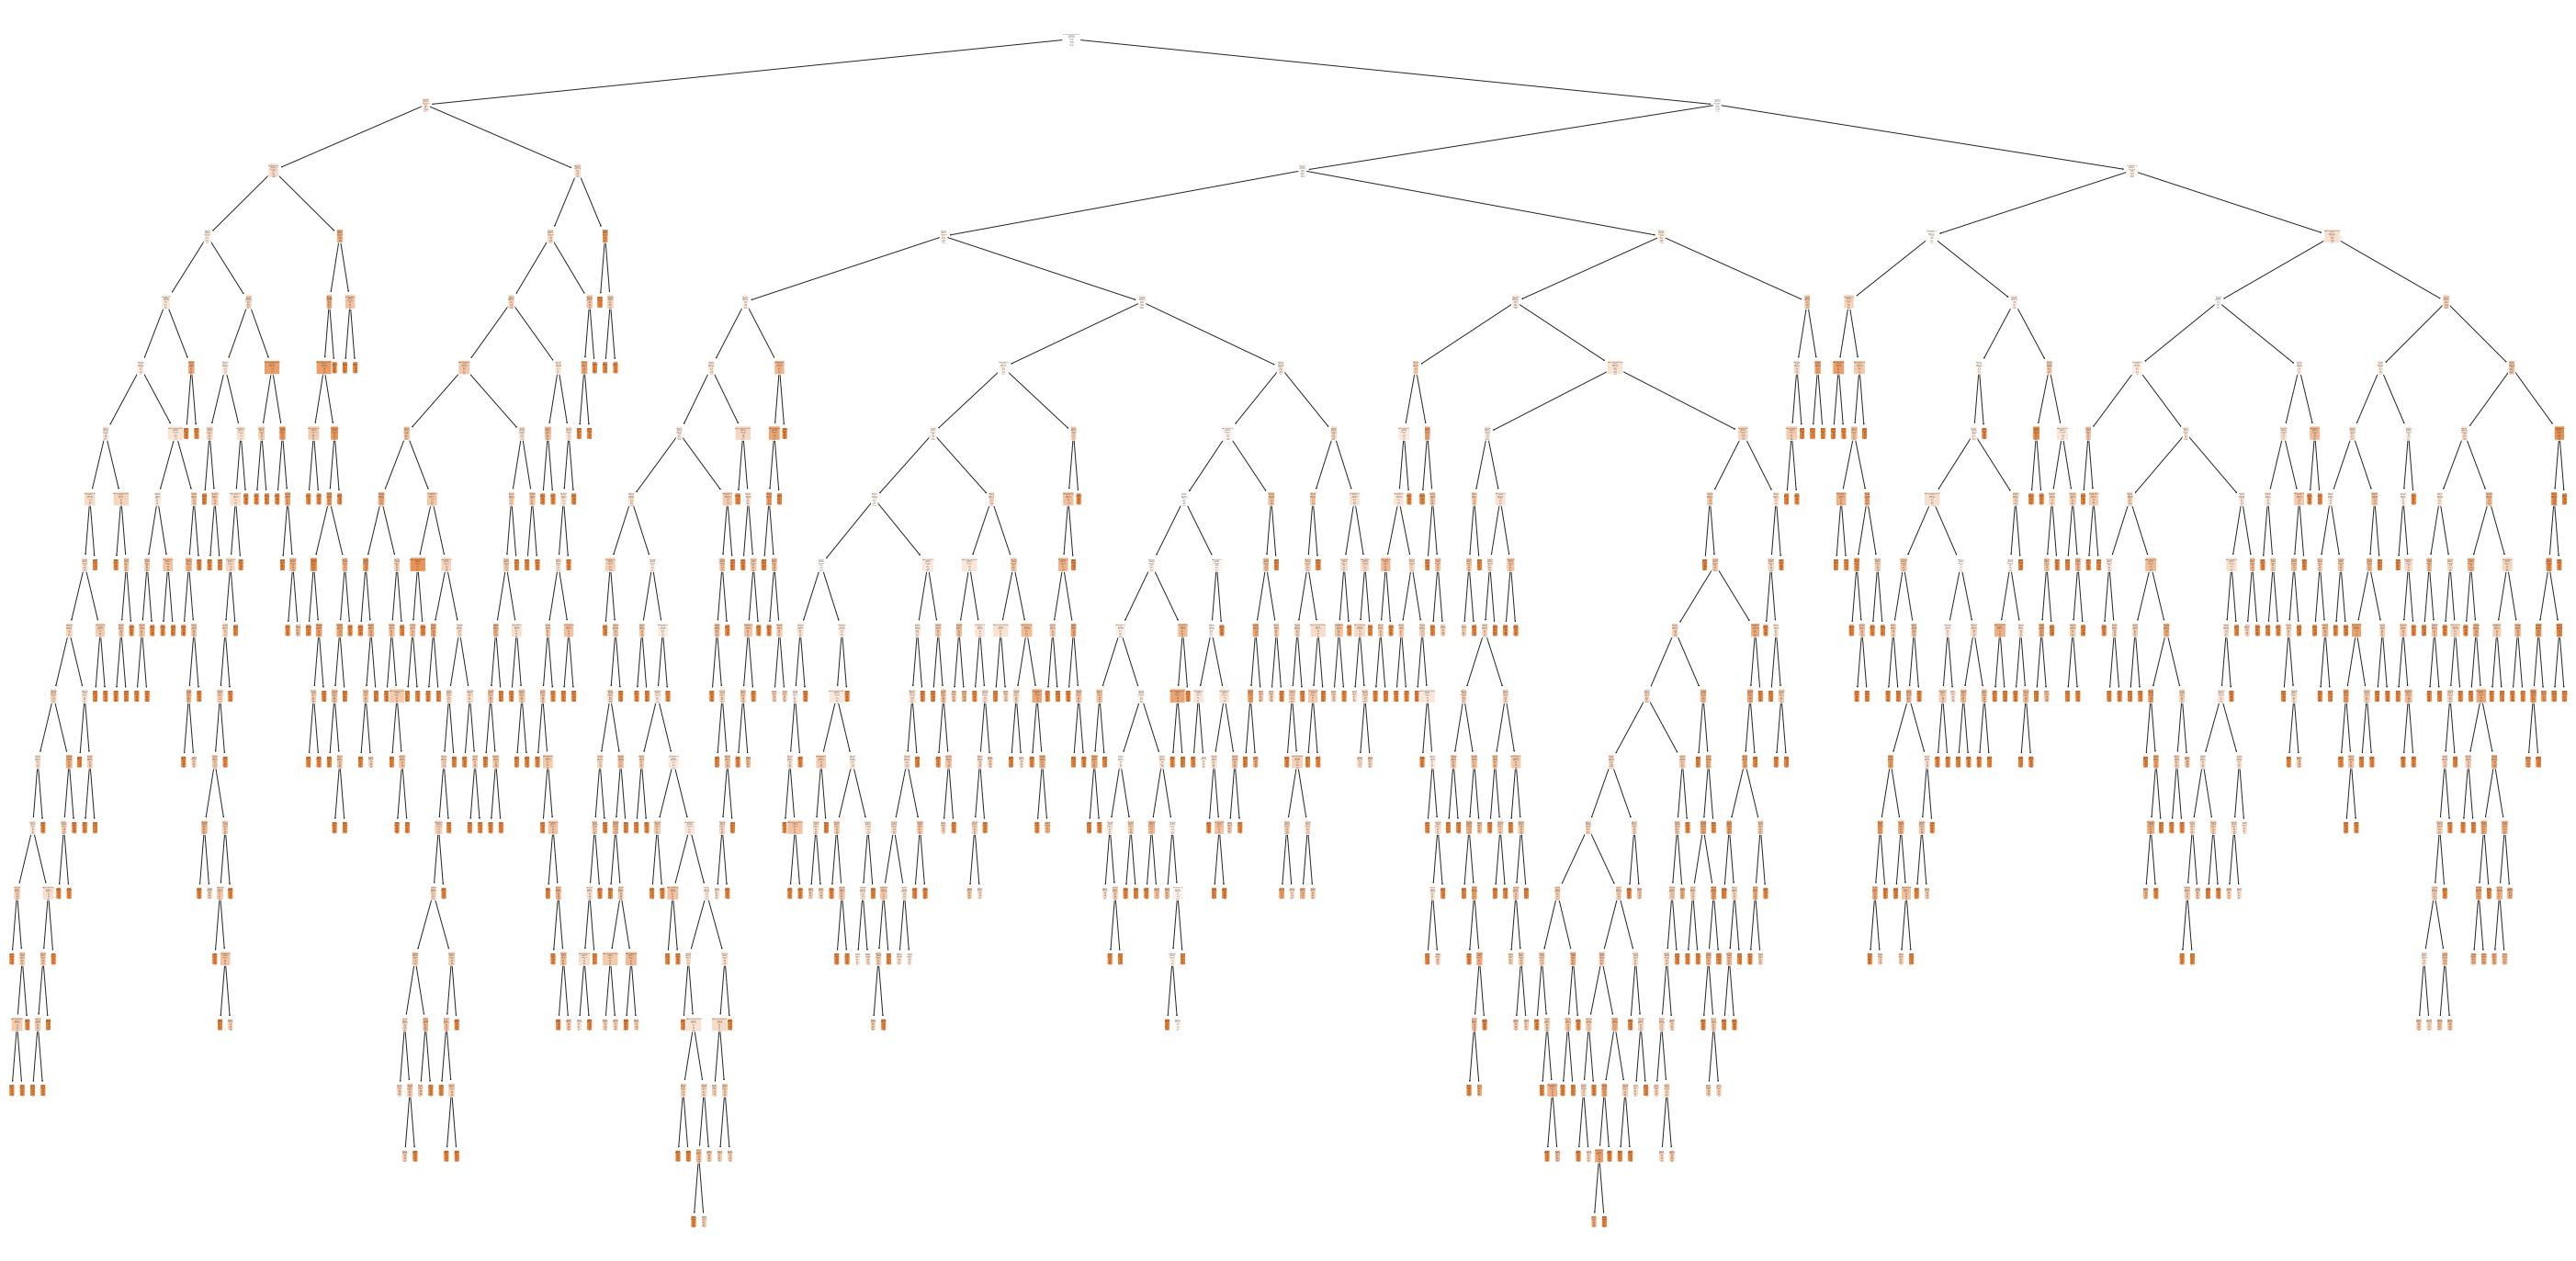

In [39]:
#see the decisiont tree
plt.figure(figsize=(50,25))
plot_tree(clf_dt_n,
         filled=True,
         rounded=True,
         class_names=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II','Obesity_Type_III'],
         feature_names=df_final.columns);

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        67
           1       0.40      0.44      0.42        52
           2       0.66      0.70      0.68        60
           3       0.66      0.83      0.74        52
           4       0.85      0.98      0.91        65
           5       0.55      0.49      0.52        59
           6       0.58      0.41      0.48        68

    accuracy                           0.65       423
   macro avg       0.63      0.64      0.63       423
weighted avg       0.64      0.65      0.64       423



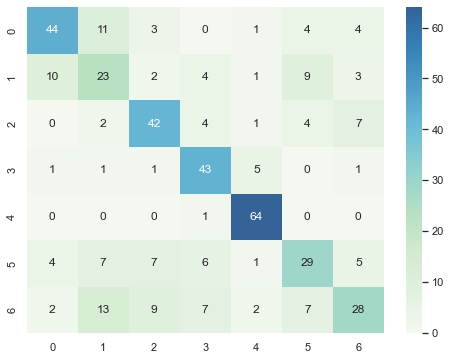

In [40]:
y_pred_class = np.argmax(mul_clas.predict(X_test, verbose=0),axis=1)
y_test_class = np.argmax(y_test, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_test, y_test_class)

### Regresión logistica 

In [41]:
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn import linear_model
from sklearn import model_selection

In [42]:
#y = np.asarray((df_final['NObeyesdad']).values).astype('float32')

In [43]:
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [44]:
df_y=df_final[['NObeyesdad']]
df_y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [45]:
y_1=Encoder(df_y)

In [46]:
y_1

,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


In [47]:
X_entreno,X_testeo,Y_entreno,Y_testeo= model_selection.train_test_split(X,y_1,test_size=0.3,random_state=29)

In [48]:
X_entreno.shape

(1477, 38)

In [49]:
X_testeo.shape

(634, 38)

In [50]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_entreno,Y_entreno)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [51]:
lm.score(X_testeo, Y_testeo)

0.5678233438485805

              precision    recall  f1-score   support

           0       1.00      0.11      0.20       634
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.11       634
   macro avg       0.14      0.02      0.03       634
weighted avg       1.00      0.11      0.20       634



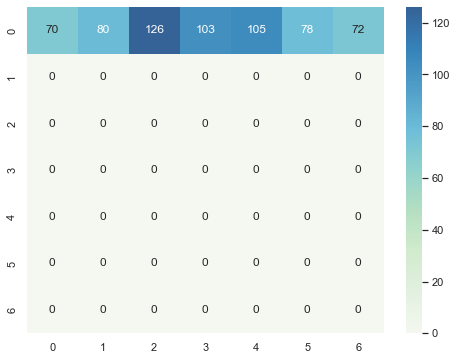

In [52]:
y_pred_class = np.argmax(mul_clas.predict(X_testeo, verbose=0),axis=1)
y_test_class = np.argmax(Y_testeo, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_testeo, y_test_class)